In [1]:
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count
import gc
import time
gc.enable()
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import folium
import branca.colormap as cm

warnings.filterwarnings('ignore')

In [2]:
# Collect preprocessed data
data1 = pd.read_feather('data/Divvy_data_2017_Q1.feather')
data2 = pd.read_feather('data/Divvy_data_2017_Q2.feather')
data3 = pd.read_feather('data/Divvy_data_2017_Q3.feather')
data4 = pd.read_feather('data/Divvy_data_2017_Q4.feather')

data = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829036 entries, 0 to 3829035
Data columns (total 25 columns):
trip_id              int64
bikeid               int64
tripduration         int64
from_station_id      int64
from_station_name    object
to_station_id        int64
to_station_name      object
usertype             object
gender               object
year                 int64
day                  int64
month                int64
hour                 int64
minute               int64
second               int64
dayofweek            int64
Age                  float64
from_city            object
from_latitude        float64
from_longitude       float64
from_dpcapacity      int64
to_city              object
to_latitude          float64
to_longitude         float64
to_dpcapacity        int64
dtypes: float64(5), int64(14), object(6)
memory usage: 730.3+ MB


In [4]:
data.iloc[0]

trip_id                           13518905
bikeid                                5292
tripduration                           857
from_station_id                         66
from_station_name     Clinton St & Lake St
to_station_id                          171
to_station_name      May St & Cullerton St
usertype                        Subscriber
gender                                Male
year                                  2017
day                                     31
month                                    3
hour                                    23
minute                                  59
second                                   7
dayofweek                                4
Age                                     28
from_city                          Chicago
from_latitude                      41.8856
from_longitude                    -87.6418
from_dpcapacity                         23
to_city                           Chicago 
to_latitude                        41.8551
to_longitud

In [13]:
data.head()

,trip_id,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,year,...,dayofweek,Age,from_city,from_latitude,from_longitude,from_dpcapacity,to_city,to_latitude,to_longitude,to_dpcapacity
0,13518905,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,2017,...,4,28.0,Chicago,41.885637,-87.641823,23,Chicago,41.855136,-87.654127,11
1,13518904,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,2017,...,4,27.0,Chicago,41.890912,-87.626804,15,Chicago,41.891020,-87.617300,31
2,13518903,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,2017,...,4,38.0,Chicago,42.015962,-87.668570,23,Chicago,42.009074,-87.674190,19
3,13518902,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,2017,...,4,32.0,Chicago,41.893992,-87.629318,23,Chicago,41.894503,-87.617854,31
4,13518901,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,2017,...,4,28.0,Chicago,41.921540,-87.653818,19,Chicago,41.908537,-87.648627,20


In [12]:
data['from_station_id'].nunique()

585

In [9]:
585*365

213525

### Daily demand for each station over a year

In [72]:
station_ids = data['from_station_id'].unique()

In [83]:
def plot_station_demand_over_year(sid=None, rank=None):
    if not sid:
        try:
            sid = station_ids[rank]
        except:
            return
    
    daily_demand = data[data['from_station_id'] == sid][['day', 'month', 'tripduration']].groupby(['month', 'day']).count().reset_index()
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(daily_demand['tripduration'],'o-', ms=4)
    ax.set_title('Station_id: %d'%sid, fontsize=20)
    ax.set_xlabel('Day in 2017',fontsize=18)
    ax.set_ylabel('Daily demand',fontsize=18)
    plt.show()

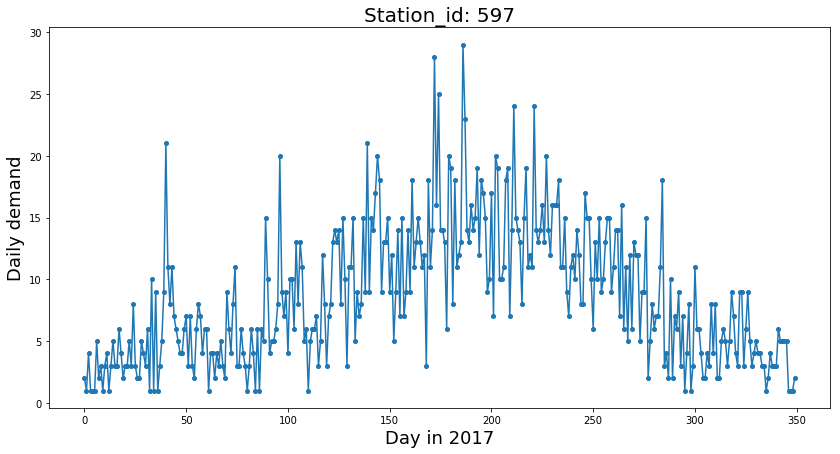

In [94]:
plot_station_demand_over_year(rank=340)

### Daily demand for each station over a year

In [37]:
station_demand = pd.DataFrame()

In [38]:
station_demand['station_id'] = station_ids

In [85]:
def demand_mean_per_station(row):
    tmp = data[data['from_station_id'] == row['station_id']][['day', 'month', 'tripduration']].groupby(['day', 'month']).count().reset_index()
    return tmp['tripduration'].mean()

station_demand['daily_mean'] = station_demand.apply(lambda row: demand_mean_per_station(row), axis=1)

In [117]:
da = np.array(station_demand.sort_values(by='daily_mean',ascending=False)['daily_mean'])

In [125]:
d = np.log10(d)

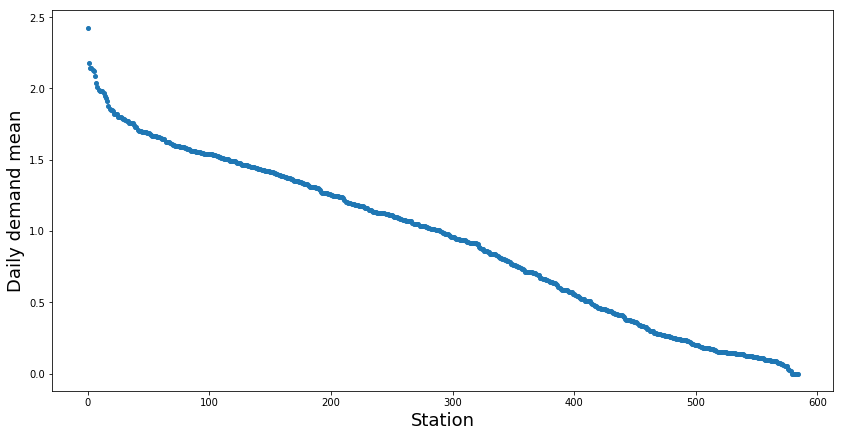

In [126]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(d,'o', ms=4)
ax.set_xlabel('Station',fontsize=18)
ax.set_ylabel('Daily demand mean',fontsize=18)
plt.show()